# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('petrol.csv')
df.head(10)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [3]:
df.columns

Index(['tax', ' income', ' highway', ' dl', ' consumption'], dtype='object')

In [4]:
#some columns is having extra spacce, so removing it
df.rename(columns={' income' :'income', ' highway' : 'highway', ' dl':'dl', ' consumption':'consumption'}, inplace=True)

In [5]:
# checking for missing values
df[df.isna().any(axis=1)]

,tax,income,highway,dl,consumption


In [6]:
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

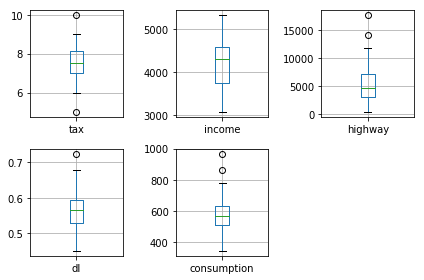

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3) # create figure and axes

for i,el in enumerate(list(df.columns.values)[:]):
    a = df.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout() 
plt.show()

In [9]:
# Removing outliers and assigning it to new dataframe

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

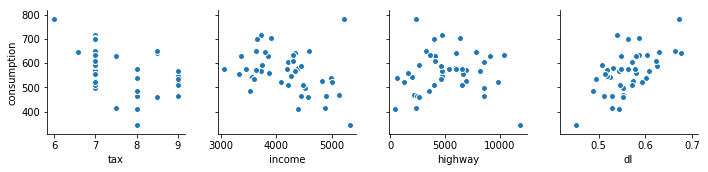

In [10]:
import seaborn as sns
#pair plot to check the associstion with the dependent variable
df_attr = df_new.iloc[:, 0:10]
sns.pairplot(df_attr, x_vars=['tax','income','highway','dl'],y_vars=['consumption'], diag_kind='kde')

In [11]:
df_new.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [12]:
# independent variable dl is having stronger association with dependent variable consumption

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [13]:
X = df_new.drop({'income','highway','consumption'}, axis=1)

Y = df_new[['consumption']]

In [14]:
print('X shape:- ',X.shape,'\nY shape:- ',Y.shape)

X shape:-  (43, 2) 
Y shape:-  (43, 1)


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)

In [16]:
print('Training:\n\tX shape:- ',X_train.shape,'\n\tY shape:- ',Y_train.shape)
print('Test:\n\tX shape:- ',X_test.shape,'\n\tY shape:- ',Y_test.shape)

Training:
	X shape:-  (34, 2) 
	Y shape:-  (34, 1)
Test:
	X shape:-  (9, 2) 
	Y shape:-  (9, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
df_coeff = pd.DataFrame()
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    df_coeff = df_coeff.append({col_name:regression_model.coef_[0][idx]},ignore_index=True)
df_coeff = df_coeff.fillna('-')
print(df_coeff)

The coefficient for tax is -30.70924254754727
The coefficient for dl is 892.8862087487333
       tax       dl
0 -30.7092        -
1        -  892.886


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [19]:
# checking the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 292.55096524614896


In [20]:
#Accuracy score for Training dataset
regression_model.score(X_train, Y_train)

0.4657867429910155

In [21]:
#Accuracy score for Test dataset
regression_model.score(X_test, Y_test)

0.2876056314158515

In [22]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'consumption ~ tax + dl', data = data_train).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     13.51
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           6.02e-05
Time:                        18:50:08   Log-Likelihood:                -188.90
No. Observations:                  34   AIC:                             383.8
Df Residuals:                      31   BIC:                             388.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    292.5510    196.121      1.492      0.1

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [23]:
X = df_new.drop({'consumption'}, axis=1)
Y = df_new[['consumption']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)

print('Training:\n\tX shape:- ',X_train.shape,'\n\tY shape:- ',Y_train.shape)
print('Test:\n\tX shape:- ',X_test.shape,'\n\tY shape:- ',Y_test.shape)

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

Training:
	X shape:-  (34, 4) 
	Y shape:-  (34, 1)
Test:
	X shape:-  (9, 4) 
	Y shape:-  (9, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
regression_model.score(X_train, Y_train)

0.6407622941321002

In [25]:
regression_model.score(X_test, Y_test)

0.6930212207091808

# Question 9: Print the coefficients of the multilinear regression model

In [26]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for tax is -39.411583621415424
The coefficient for income is -0.06262814005687901
The coefficient for highway is -0.0030219870395790096
The coefficient for dl is 950.8827441430783


In [27]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 607.7189089086938


In [28]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'consumption ~ tax + dl + income + highway', data = data_train).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     12.93
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           3.68e-06
Time:                        18:50:15   Log-Likelihood:                -182.16
No. Observations:                  34   AIC:                             374.3
Df Residuals:                      29   BIC:                             381.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    607.7189    200.266      3.035      0.0

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

### Answer:

R squared value with two independent variable (tax, dl) is 46.6%
R squared value with four independet variable (tax, income, highway, dl) is 64.1%

It's observed that R square value is increased by increrasing the number of indepent variables. 

Model was not accurate with two independent variables and after increasing independent variable accuracy increased.